In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

warnings.simplefilter('ignore')

In [3]:
data_test = pd.read_csv('../data/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_Test_Features.csv')  # Test dataset

data_training = pd.read_csv('../data/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_Training_Features.csv') # Train dataset

data_target = pd.read_csv('../data/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_Training_Labels.csv')

# Exploratory data analysis 

# Labels



For this competition, there are two target variables:



- **h1n1_vaccine** - Whether respondent received H1N1 flu vaccine.

- **seasonal_vaccine** - Whether respondent received seasonal flu vaccine.



Both are binary variables: 

- 0 = No 

- 1 = Yes. 



Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.



## The features in this dataset



 We have a dataset with 36 columns. The first column `respondent_id` is a unique and random identifier. The remaining 35 features are described below.



For all binary variables: 

- 0 = No 

- 1 = Yes.



- **h1n1_concern** - Level of concern about the H1N1 flu.  

  0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.



- **h1n1_knowledge** - Level of knowledge about H1N1 flu.  

  0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.



- **behavioral_antiviral_meds** - Has taken antiviral medications. *(binary)*



- **behavioral_avoidance** - Has avoided close contact with others with flu-like symptoms. *(binary)*



- **behavioral_face_mask** - Has bought a face mask. *(binary)*



- **behavioral_wash_hands** - Has frequently washed hands or used hand sanitizer. *(binary)*



- **behavioral_large_gatherings** - Has reduced time at large gatherings. *(binary)*



- **behavioral_outside_home** - Has reduced contact with people outside of own household. *(binary)*



- **behavioral_touch_face** - Has avoided touching eyes, nose, or mouth. *(binary)*



- **doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor. *(binary)*



- **doctor_recc_seasonal** - Seasonal flu vaccine was recommended by doctor. *(binary)*



- **chronic_med_condition** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. *(binary)*



- **child_under_6_months** - Has regular close contact with a child under the age of six months. *(binary)*



- **health_worker** - Is a healthcare worker. *(binary)*



- **health_insurance** - Has health insurance. *(binary)*



- **opinion_h1n1_vacc_effective** - Respondent's opinion about H1N1 vaccine effectiveness.  

  1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.



- **opinion_h1n1_risk** - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.  

  1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.



- **opinion_h1n1_sick_from_vacc** - Respondent's worry of getting sick from taking H1N1 vaccine.  

  1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.



- **opinion_seas_vacc_effective** - Respondent's opinion about seasonal flu vaccine effectiveness.  

  1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.



- **opinion_seas_risk** - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.  

  1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.



- **opinion_seas_sick_from_vacc** - Respondent's worry of getting sick from taking seasonal flu vaccine.  

  1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.



- **age_group** - Age group of respondent.



- **education** - Self-reported education level.



- **race** - Race of respondent.



- **sex** - Sex of respondent.



- **income_poverty** - Household annual income of respondent with respect to 2008 Census poverty thresholds.



- **marital_status** - Marital status of respondent.



- **rent_or_own** - Housing situation of respondent.



- **employment_status** - Employment status of respondent.



- **hhs_geo_region** - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.



- **census_msa** - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.



- **household_adults** - Number of other adults in household, top-coded to 3.



- **household_children** - Number of children in household, top-coded to 3.



- **employment_industry** - Type of industry respondent is employed in. Values are represented as short random character strings.



- **employment_occupation** - Type of occupation of respondent. Values are represented as short random character strings.


In [4]:
data_test.index = data_test['respondent_id']

data_training.index = data_training['respondent_id']

data_training.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
data_target.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [6]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_months 

## Study missing values

In [7]:
# Let's look at the number of missing values in the train dataset

missing_values = data_training.isnull().sum()

missing_values = missing_values[missing_values > 0]

#print(missing_values)

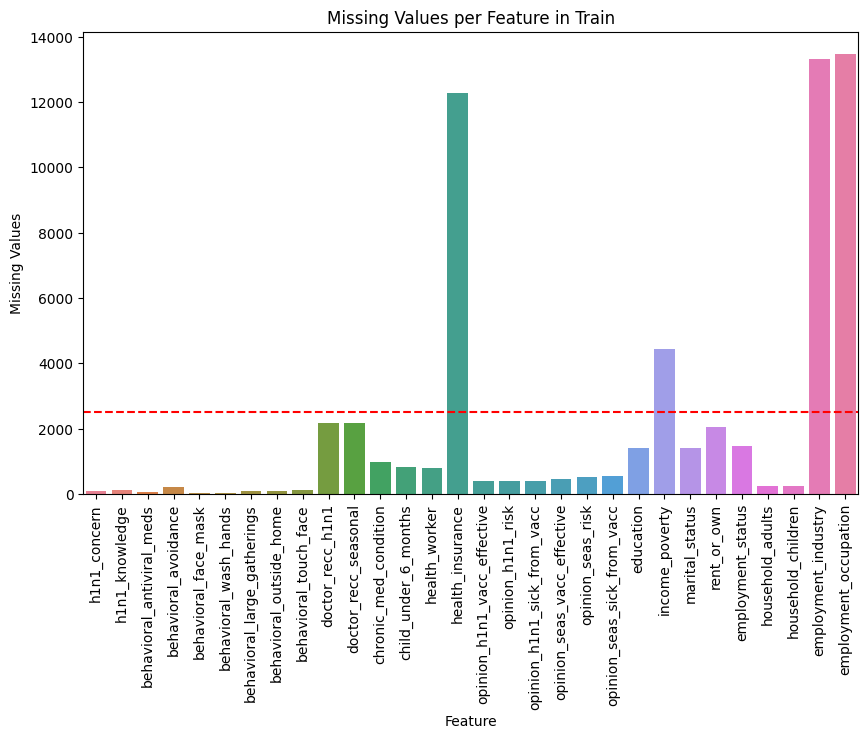

In [8]:
df_nulls = missing_values[missing_values > 0].reset_index()
df_nulls.columns = ['Feature', 'Missing Values']

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Missing Values', data=df_nulls, hue = 'Feature')
plt.title('Missing Values per Feature in Train')
plt.xticks(rotation=90)
plt.axhline(y=2500, color='red', linestyle='--')

plt.show()


In [9]:
# # Let's look at the number of missing values in the test dataset

missing_values = data_test.isnull().sum()

missing_values = missing_values[missing_values > 0]

print(missing_values)

h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
education                       1407
income_poverty                  4497
marital_status                  1442
rent_or_own                     2036
employment_status               1471
household_adults                 225
h

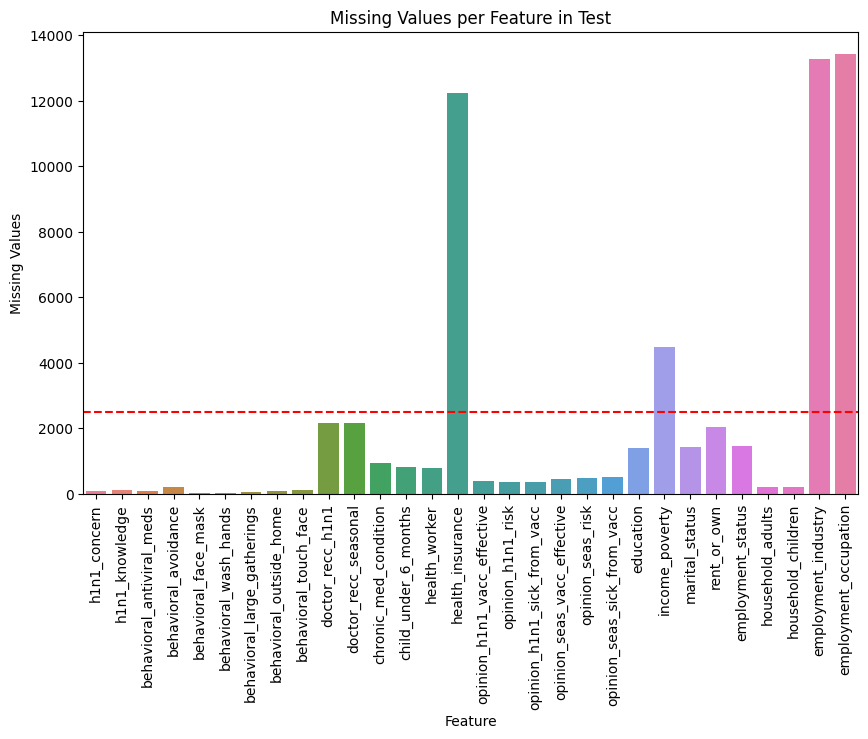

In [10]:
df_nulls = missing_values[missing_values > 0].reset_index()
df_nulls.columns = ['Feature', 'Missing Values']

plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Missing Values', data=df_nulls, hue = 'Feature')
plt.title('Missing Values per Feature in Test')
plt.xticks(rotation=90)
plt.axhline(y=2500, color='red', linestyle='--')

plt.show()


In [11]:
# Count the number of rows with any missing values in train dataset

rows_with_nan = data_training.isnull().any(axis=1).sum()

print('Number of rows with missing values:', rows_with_nan)


Number of rows with missing values: 20270


In [12]:
# Count the number of rows with any missing values in test dataset

rows_with_nan = data_test.isnull().any(axis=1).sum()

print('Number of rows with missing values:', rows_with_nan)


Number of rows with missing values: 20209


There are too many missing values in our datasets. So, we can not just drop them. Firstly, let's get rid off columns which contain a lot of NA values.

In [13]:
#Let's remove features with a lot of NA's

data_training = data_training.drop(columns=['health_insurance', 'employment_industry', 'employment_occupation', 'income_poverty'], axis=1)

data_test = data_test.drop(columns=['health_insurance', 'employment_industry', 'employment_occupation', 'income_poverty'], axis=1)

We can use knn algorithm to fill in the missing values

To utilize the KNN (k-Nearest Neighbors) method for filling in missing values in categorical data, the fancyimpute library can be employed. This approach leverages the distances between samples to identify the most suitable values for imputation. By considering the attributes of neighboring data points, KNN can effectively infer missing entries, thus enhancing data quality and maintaining statistical integrity within the dataset. Additionally, KNN is particularly advantageous for its adaptability to various data types and its ability to handle non-linear relationships among features.

## Impute with KNN

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [15]:
categorical_columns = ['age_group', 'education', 'race', 'sex', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region','census_msa']

numerical_columns = [
    'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
    'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1',
    'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
    'health_worker', 'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
    'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
    'household_children']

In [16]:
data_training_encoded = data_training.copy()
mapping_dicts_training = {}
# Применяем численное кодирование к уникальным значениям каждой колонки
for col in categorical_columns:
    if col in data_training_encoded.columns:
        unique_values = data_training_encoded[col].dropna().unique()
        value_mapping = {value: i for i, value in enumerate(unique_values) if pd.notna(value)}
        mapping_dicts_training[col] = {i: value for value, i in value_mapping.items()}
        data_training_encoded[col] = data_training_encoded[col].map(value_mapping)

In [17]:
data_test_encoded = data_test.copy()
mapping_dicts_test = {}
# Применяем численное кодирование к уникальным значениям каждой колонки
for col in categorical_columns:
    if col in data_test_encoded.columns:
        unique_values = data_test_encoded[col].dropna().unique()
        value_mapping = {value: i for i, value in enumerate(unique_values) if pd.notna(value)}
        mapping_dicts_test[col] = {i: value for value, i in value_mapping.items()}
        data_test_encoded[col] = data_test_encoded[col].map(value_mapping)

In [18]:
# Применение KNN для заполнения пропусков в обучающем наборе

knn_imputer = KNNImputer(n_neighbors=5)  # Задаем количество соседей

In [19]:
combined_filled_train = knn_imputer.fit_transform(data_training_encoded)

combined_filled_test = knn_imputer.fit_transform(data_test_encoded)

In [20]:
combined_filled_train = np.round(combined_filled_train).astype(int)
filled_train_df = pd.DataFrame(combined_filled_train, columns=data_training.columns)

for col in categorical_columns:
    if col in filled_train_df.columns and col in mapping_dicts_training:
        reverse_mapping = mapping_dicts_training[col]
        filled_train_df[col] = filled_train_df[col].map(reverse_mapping).astype(object)


filled_train_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,1,0,0,0,0,0,0,1,1,...,< 12 Years,White,Female,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0
1,1,3,2,0,1,0,1,0,1,1,...,12 Years,White,Male,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0
2,2,1,1,0,1,0,0,0,0,0,...,College Graduate,White,Male,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0
3,3,1,1,0,1,0,1,1,0,0,...,12 Years,White,Female,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0
4,4,2,1,0,1,0,1,1,0,1,...,Some College,White,Female,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0


In [21]:
rows_with_nan = filled_train_df.isnull().any(axis=1).sum()

print('Number of rows with missing values:', rows_with_nan)

Number of rows with missing values: 0


In [22]:
data_training.shape

(26707, 32)

In [23]:
filled_train_df.shape

(26707, 32)

In [24]:
combined_filled_test = np.round(combined_filled_test).astype(int)
filled_test_df = pd.DataFrame(combined_filled_test, columns=data_test.columns)

for col in categorical_columns:
    if col in filled_test_df.columns and col in mapping_dicts_test:
        reverse_mapping = mapping_dicts_test[col]
        filled_test_df[col] = filled_test_df[col].map(reverse_mapping).astype(object)


filled_test_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,26707,2,2,0,1,0,1,1,0,1,...,College Graduate,Hispanic,Female,Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1,0
1,26708,1,1,0,0,0,0,0,0,0,...,12 Years,White,Male,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3,0
2,26709,2,2,0,0,1,1,1,1,1,...,College Graduate,White,Male,Married,Own,Employed,lrircsnp,Non-MSA,1,0
3,26710,1,1,0,0,0,0,0,0,0,...,12 Years,White,Female,Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1,0
4,26711,3,1,1,1,0,1,1,1,1,...,12 Years,Black,Female,Not Married,Own,Employed,lzgpxyit,Non-MSA,0,1


In [25]:
rows_with_nan = filled_test_df.isnull().any(axis=1).sum()

print('Number of rows with missing values:', rows_with_nan)

Number of rows with missing values: 0


In [26]:
data_test.shape

(26708, 32)

In [27]:
filled_test_df.shape

(26708, 32)

## EDA

In [28]:
data_cat_for_bar = filled_train_df[['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 
                                    'behavioral_face_mask', 'behavioral_wash_hands','behavioral_large_gatherings', 'behavioral_outside_home',
                                    'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
                                    'chronic_med_condition', 'child_under_6_months', 'health_worker',
                                    'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
                                    'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
                                    'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
                                    'education', 'race', 'sex', 'marital_status',
                                    'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
                                    'household_adults', 'household_children']]

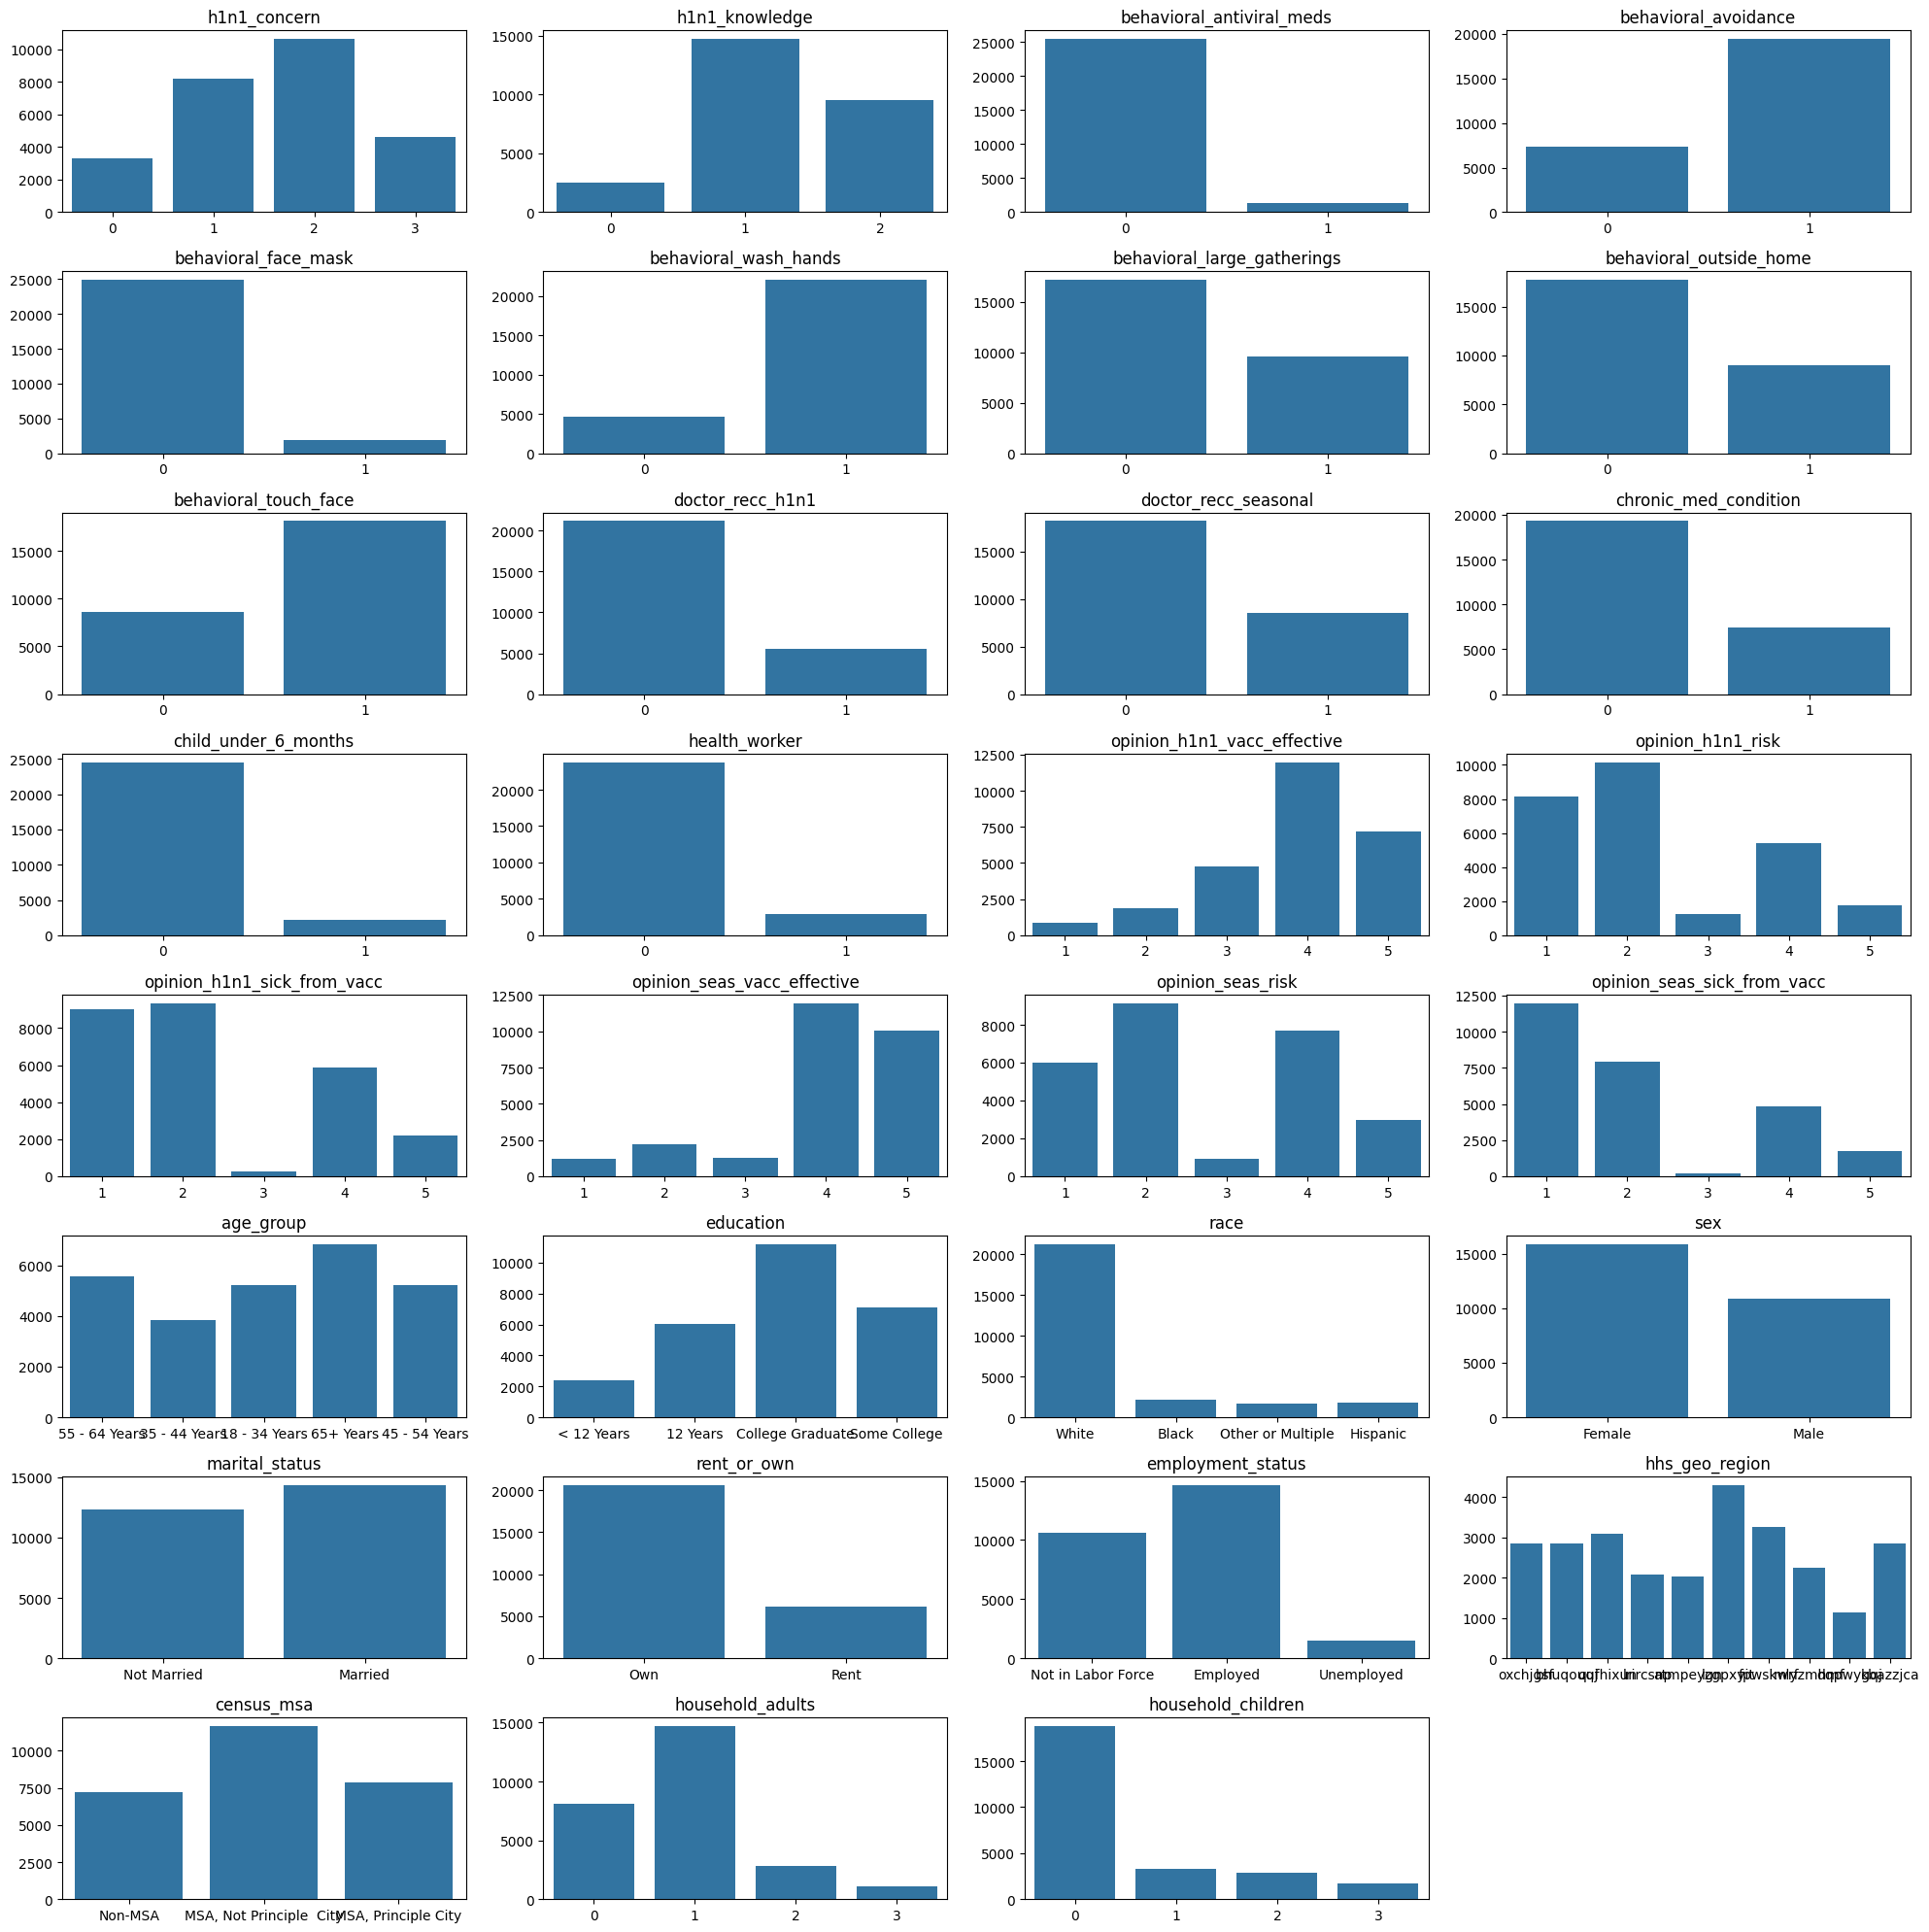

In [29]:
# Assuming data_cat_for_bar is your DataFrame with categorical features

fig = plt.figure(figsize=(20, 20))

# Iterate over the categorical columns (assuming all columns are categorical)
for i in range(1, data_cat_for_bar.shape[1] + 1):
    ax = fig.add_subplot(8, 4, i)
    
    # Create a count plot for each categorical feature
    sns.countplot(x=data_cat_for_bar.columns[i-1], 
                  data=data_cat_for_bar, 
                  ax=ax)
    
    # Set the title for each subplot
    ax.set_title(data_cat_for_bar.columns[i-1])
    ax.set_xlabel('')  # Optionally remove x-axis labels for better readability
    ax.set_ylabel('')  # Optionally remove y-axis labels

# Adjust the layout
plt.tight_layout()

# Display the plots
plt.show()

In [30]:
categorical_columns = ['age_group', 'education', 'race', 'sex', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region','census_msa']

In [31]:
numerical_columns = [
    'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance',
    'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings',
    'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1',
    'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
    'health_worker', 'opinion_h1n1_vacc_effective',
    'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
    'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
    'household_children']

In [32]:
categorical_data_encoded_train = pd.get_dummies(filled_train_df[categorical_columns])

In [33]:
categorical_data_encoded_train['respondent_id'] = categorical_data_encoded_train.index
categorical_data_encoded_train.head()

,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,...,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA,respondent_id
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,0
1,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
2,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,2
3,False,False,False,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,3
4,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,4


In [34]:
data_for_corr_cat = pd.merge(categorical_data_encoded_train.reset_index(drop=True), data_target.reset_index(drop=True), on= 'respondent_id')
data_for_corr_cat.shape

(26707, 38)

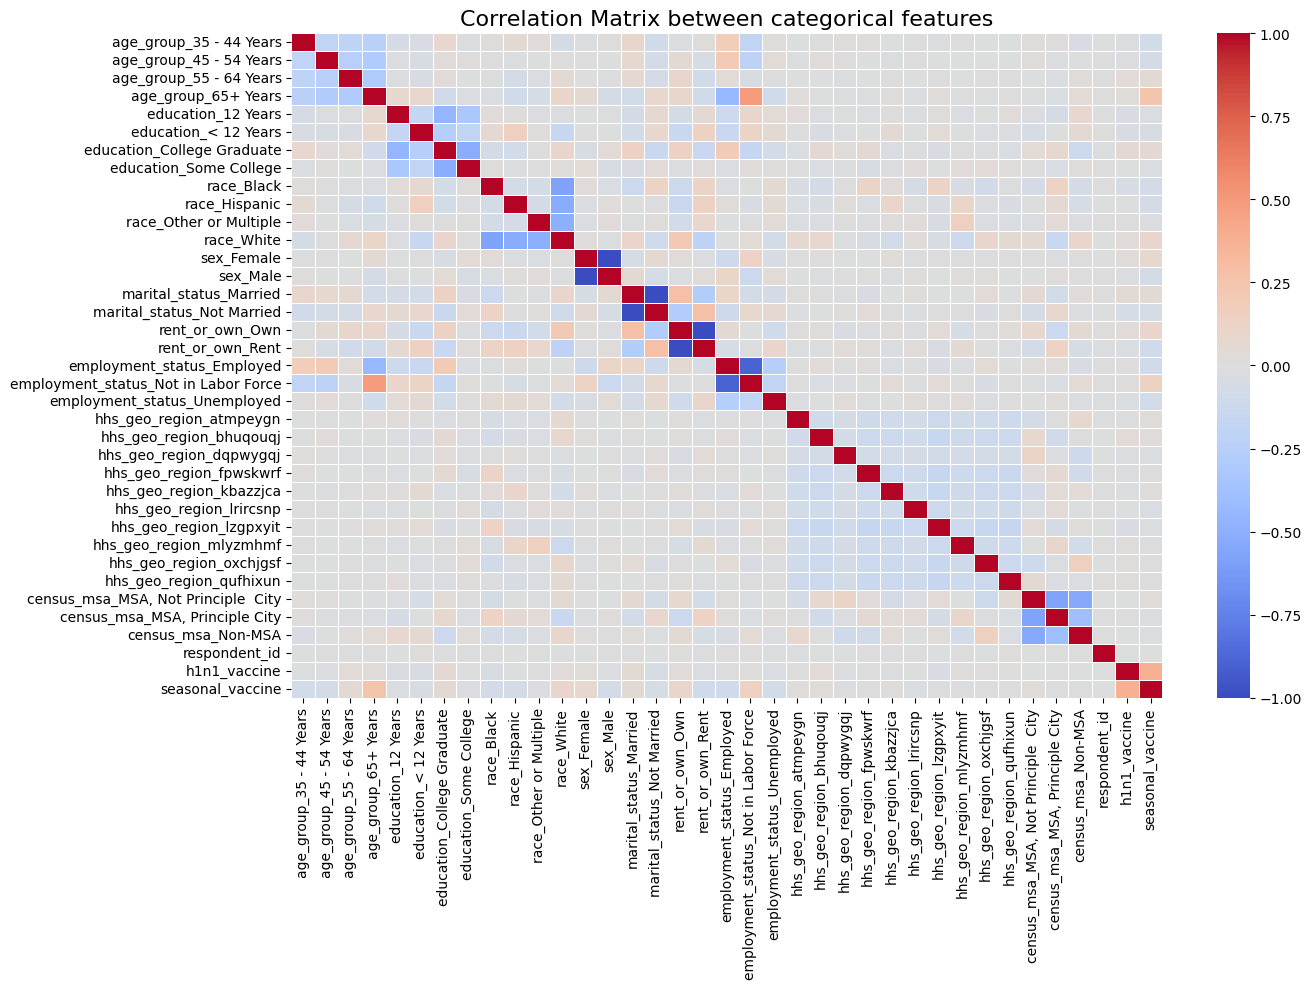

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

features = data_for_corr_cat.iloc[:, 1:]

correlation_matrix = features.corr(method='pearson')

plt.figure(figsize=(14, 10))  
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)  
plt.title('Correlation Matrix between categorical features', fontsize=16)  
plt.tight_layout() 
plt.show()

In [36]:
data_for_corr_num = pd.merge(filled_train_df[numerical_columns], data_target, left_index=True, right_index=True)
data_for_corr_num.shape

(26707, 25)

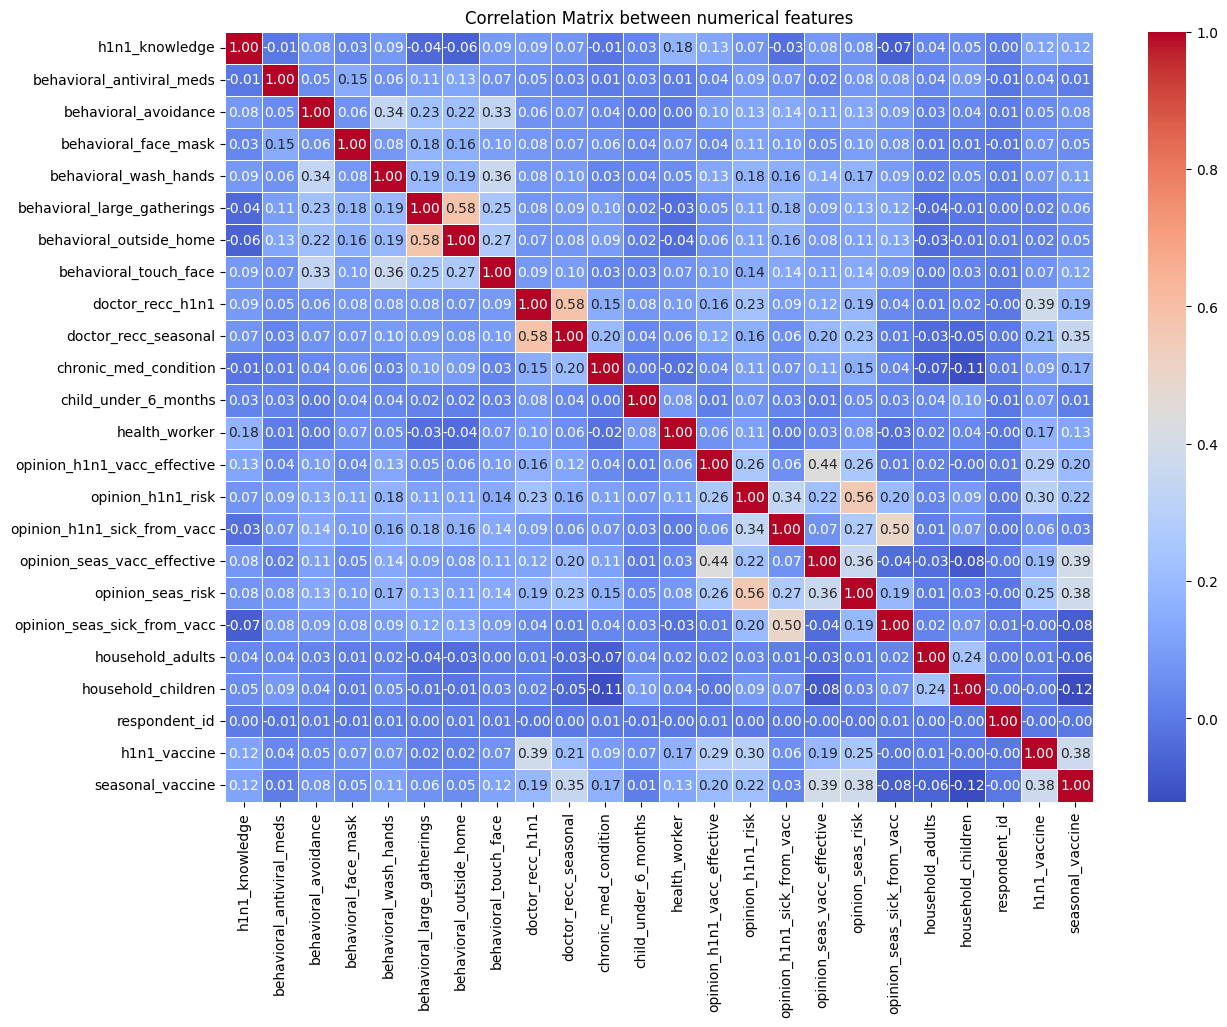

In [37]:
features = data_for_corr_num.iloc[:, 1:]

correlation_matrix = features.corr(method='spearman')

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix between numerical features')
plt.show()

In [38]:
correlation = data_for_corr_num.iloc[:, 1:].corr()['h1n1_vaccine'].abs()
top_10_features = correlation.sort_values(ascending=False).head(11)  
top_10_features = top_10_features.drop('h1n1_vaccine')

print(top_10_features)

doctor_recc_h1n1               0.386251
seasonal_vaccine               0.377143
opinion_h1n1_risk              0.320337
opinion_h1n1_vacc_effective    0.266803
opinion_seas_risk              0.255734
doctor_recc_seasonal           0.205753
opinion_seas_vacc_effective    0.177474
health_worker                  0.167441
h1n1_knowledge                 0.117622
chronic_med_condition          0.094316
Name: h1n1_vaccine, dtype: float64


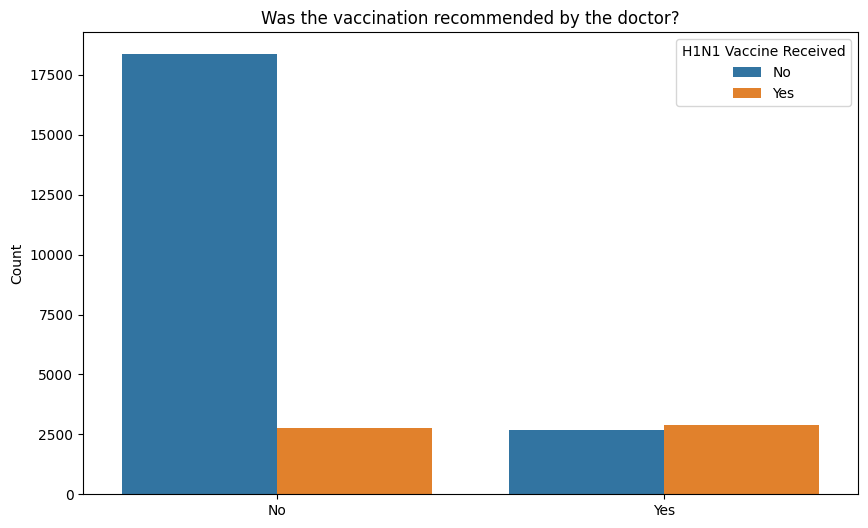

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_for_corr_num, x='doctor_recc_h1n1', hue='h1n1_vaccine')
plt.title('Was the vaccination recommended by the doctor?')
plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='H1N1 Vaccine Received', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

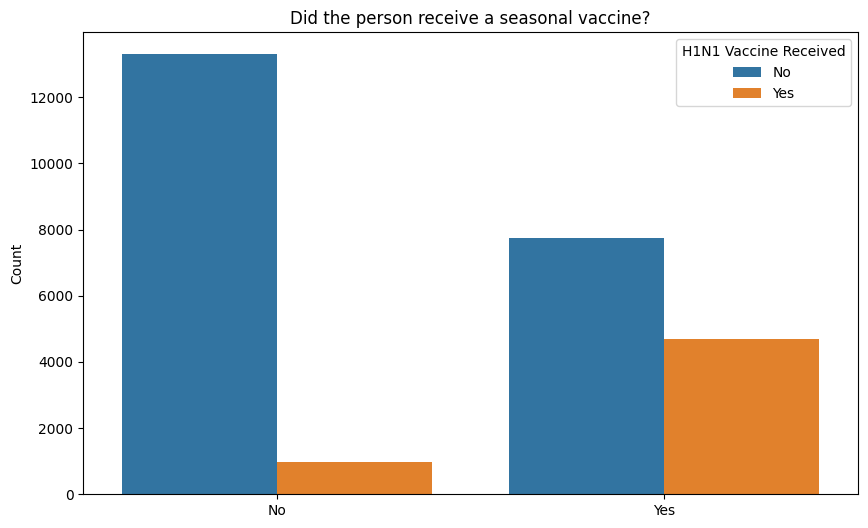

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_for_corr_num, x='seasonal_vaccine', hue='h1n1_vaccine')
plt.title('Did the person receive a seasonal vaccine?')
plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='H1N1 Vaccine Received', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

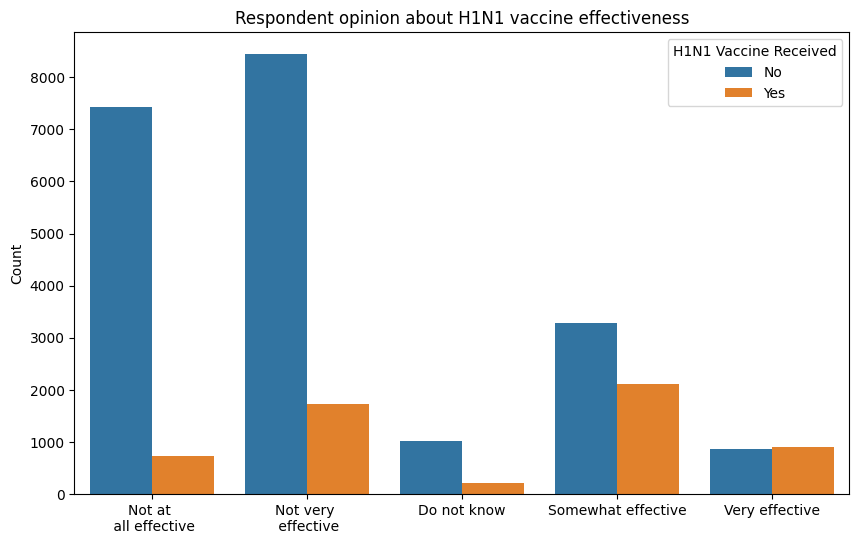

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_for_corr_num, x='opinion_h1n1_risk', hue='h1n1_vaccine')
plt.title('Respondent opinion about H1N1 vaccine effectiveness')
plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='H1N1 Vaccine Received', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Not at \n all effective', 'Not very \n effective', 'Do not know', 'Somewhat effective', 'Very effective'])
plt.show()

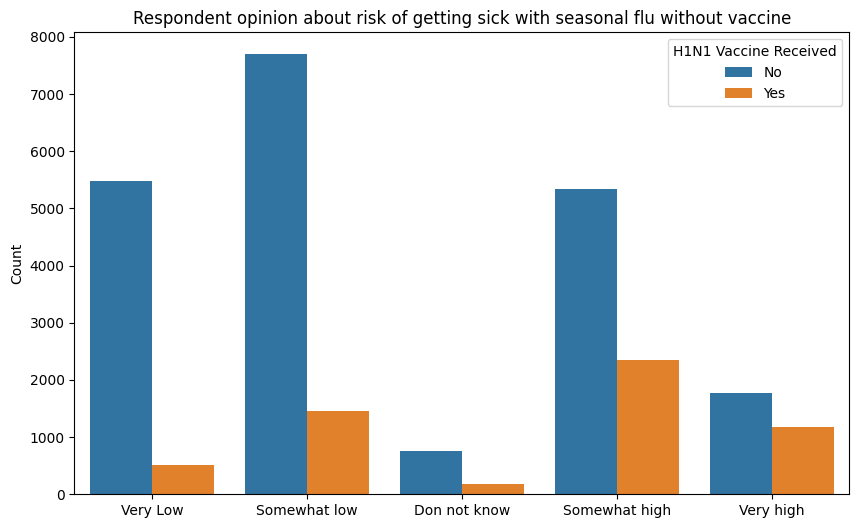

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_for_corr_num, x='opinion_seas_risk', hue='h1n1_vaccine')
plt.title('Respondent opinion about risk of getting sick with seasonal flu without vaccine')
plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='H1N1 Vaccine Received', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Very Low', 'Somewhat low', 'Don not know', 'Somewhat high', 'Very high'])
plt.show()

In [43]:
correlation = data_for_corr_num.iloc[:, 1:].corr()['seasonal_vaccine'].abs()
top_10_features = correlation.sort_values(ascending=False).head(11)  
top_10_features = top_10_features.drop('seasonal_vaccine')

print(top_10_features)

opinion_seas_risk              0.384876
h1n1_vaccine                   0.377143
opinion_seas_vacc_effective    0.357678
doctor_recc_seasonal           0.351166
opinion_h1n1_risk              0.214665
opinion_h1n1_vacc_effective    0.203371
doctor_recc_h1n1               0.192526
chronic_med_condition          0.167282
health_worker                  0.126781
behavioral_touch_face          0.119989
Name: seasonal_vaccine, dtype: float64


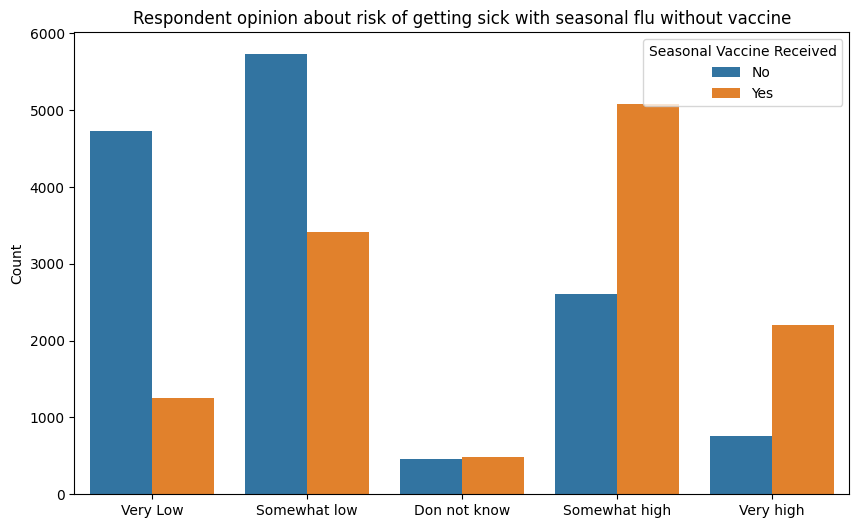

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_for_corr_num, x='opinion_seas_risk', hue='seasonal_vaccine')
plt.title('Respondent opinion about risk of getting sick with seasonal flu without vaccine')
plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='Seasonal Vaccine Received', labels=['No', 'Yes'], loc='upper right')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Very Low', 'Somewhat low', 'Don not know', 'Somewhat high', 'Very high'])
plt.show()

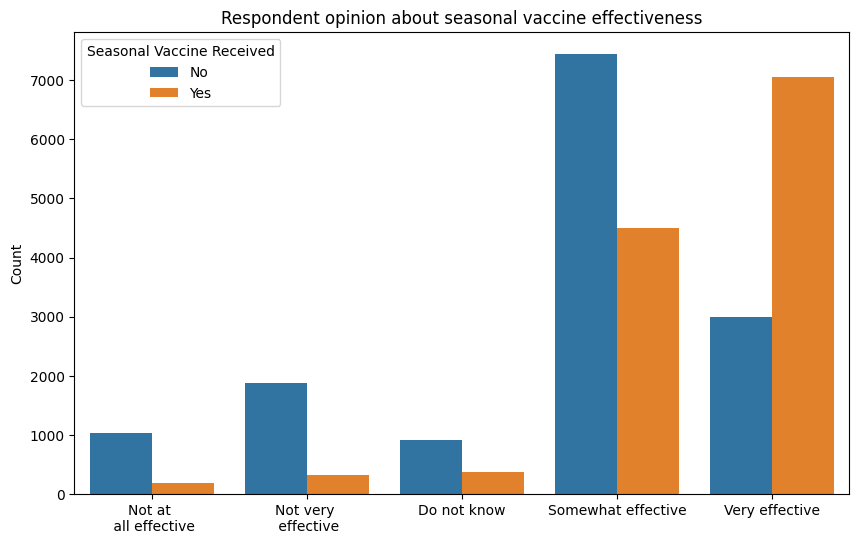

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_for_corr_num, x='opinion_seas_vacc_effective', hue='seasonal_vaccine')
plt.title('Respondent opinion about seasonal vaccine effectiveness')
plt.xlabel('')
plt.ylabel('Count')
plt.legend(title='Seasonal Vaccine Received', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Not at \n all effective', 'Not very \n effective', 'Do not know', 'Somewhat effective', 'Very effective'])
plt.show()

                        Feature        VIF
14  opinion_h1n1_vacc_effective  18.384814
17  opinion_seas_vacc_effective  18.373178
18            opinion_seas_risk   8.182273
15            opinion_h1n1_risk   7.395060
5         behavioral_wash_hands   7.174769
16  opinion_h1n1_sick_from_vacc   6.022691
0                  h1n1_concern   5.996995
1                h1n1_knowledge   5.165785
19  opinion_seas_sick_from_vacc   4.621008
3          behavioral_avoidance   4.524345


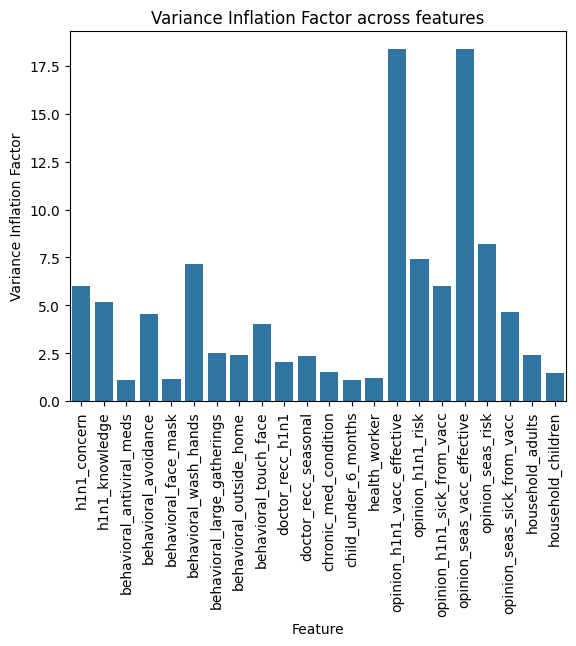

In [61]:
# Calculating VIF

vif_data = pd.DataFrame()

vif_data["Feature"] = filled_train_df[numerical_columns].columns

vif_data["VIF"] = [variance_inflation_factor(filled_train_df[numerical_columns].values, i) for i in range(filled_train_df[numerical_columns].shape[1])]

sns.barplot(x='Feature', y = 'VIF', data=vif_data)
plt.xticks(rotation = 90)
plt.ylabel('Variance Inflation Factor')
plt.title('Variance Inflation Factor across features')
# VIF values - с самой большой корреляцией

print(vif_data.sort_values(by="VIF", ascending=False).head(10))

## Target classes balance check

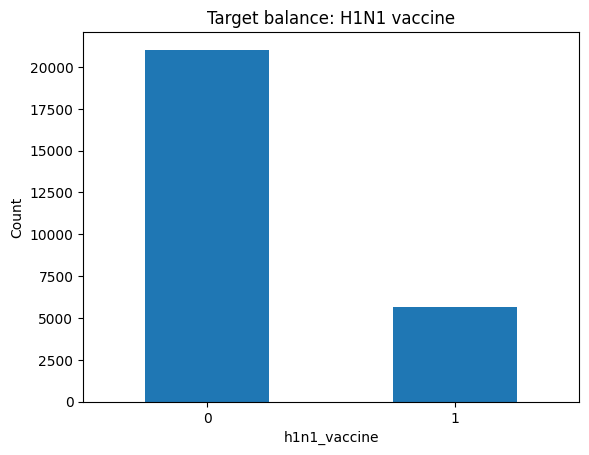

In [62]:
data_target['h1n1_vaccine'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Target balance: H1N1 vaccine')
plt.ylabel('Count');

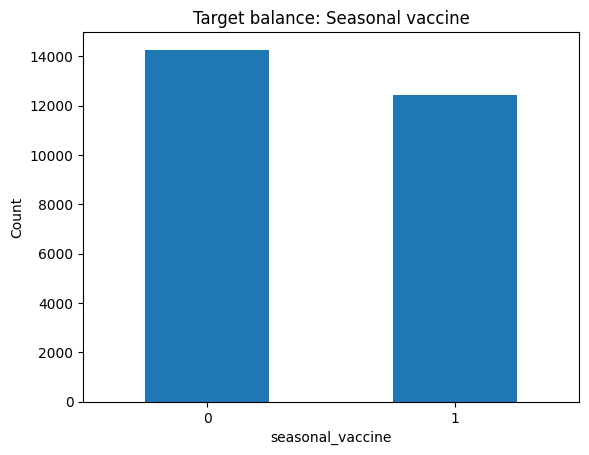

In [57]:
data_target['seasonal_vaccine'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Target balance: Seasonal vaccine')
plt.ylabel('Count');

Target value **h1n1_vaccine seems** to be unbalanced, so that we will need to account for it during splitting

## Save preprocessed data

In [63]:
filled_train_df.to_csv('../preprocessed_data/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_Training_Features.csv', index=False)
filled_test_df.to_csv('../preprocessed_data/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_Test_Features.csv', index=False)
data_target.to_csv('../preprocessed_data/Flu_Shot_Learning_Predict_H1N1_and_Seasonal_Flu_Vaccines_Training_Labels.csv', index=False)